In [1]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os
import dlib
import sys
from deepface import DeepFace
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [7]:
DATABASE_PATH = "F:\ExamProctoringSystem\FaceRecognitionModule\FaceDatabase"
test_img_path = "F:\ExamProctoringSystem\FaceRecognitionModule\TestImages\opu2.jpg"


In [ ]:
DeepFace.stream(DATABASE_PATH, model_name="Facenet512",
                detector_backend='mtcnn', enable_face_analysis=False,
                source=0 )

(224, 224, 3) <class 'numpy.ndarray'>
There are  6  representations found in  representations_vgg_face.pkl
find function lasts  1.8720054626464844  seconds


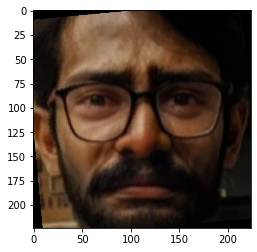

In [14]:
face = DeepFace.detectFace(test_img_path, )
print(face.shape, type(face))
df = DeepFace.find(test_img_path, DATABASE_PATH, detector_backend='opencv'
                    , enforce_detection=False)
df.head()
plt.imshow(face)

# Face Verification

In [1]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os
import dlib
import sys
import time
from deepface import DeepFace
from deepface.commons import functions, realtime, distance as dst
from deepface.detectors import FaceDetector

Using TensorFlow backend.


In [2]:
test_img_path = "F:\ExamProctoringSystem\FaceRecognitionModule\TestImages\whosethis.jpg"
DATABASE_PATH = "F:\ExamProctoringSystem\FaceRecognitionModule\FaceDatabase"
BACKENDS = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']
METRICS = ["cosine", "euclidean", "euclidean_l2"]
MODELS = ["VGG-Face", "Facenet", "Facenet512", "OpenFace",
          "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]
# face detectors
DETECTORS = ["opencv", "ssd", "mtcnn", "dlib", "retinaface"]

## Verify user

In [63]:
test_img_path = r"F:\ExamProctoringSystem\FaceRecognitionModule\TestImages\simanto.jpg"
test_img = cv2.imread(test_img_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

In [73]:

df = DeepFace.find(test_img, DATABASE_PATH,
                    model_name='VGG-Face',
                    distance_metric="euclidean_l2",
                    detector_backend="mtcnn",
                    enforce_detection=False,
                    prog_bar=True,
                    silent=True,
                    )


In [72]:
print(df["VGG-Face_euclidean_l2"][0])
print(df["identity"][0].split("\\")[-1].split("/")[0])
if df["VGG-Face_euclidean_l2"][0] > 0.6:
    print("<NoMatch>")
else:
    name = df["identity"][0].split("\\")[-1].split("/")[0]
    print(name)

0.7005307930337803
Ahnaf
<NoMatch>


In [23]:
name = df["identity"][0].split("\\")[-1].split("/")[0]
print(name)
df.head()

shihab


,identity,VGG-Face_euclidean_l2
0,F:\ExamProctoringSystem\FaceRecognitionModule\...,0.735774
1,F:\ExamProctoringSystem\FaceRecognitionModule\...,0.774910
2,F:\ExamProctoringSystem\FaceRecognitionModule\...,0.815928
3,F:\ExamProctoringSystem\FaceRecognitionModule\...,0.844184
4,F:\ExamProctoringSystem\FaceRecognitionModule\...,0.845994


## Add user using webcam

In [12]:
test_img_path = "F:\ExamProctoringSystem\FaceRecognitionModule\TestImages\whosethis.jpg"
DATABASE_PATH = "F:\ExamProctoringSystem\FaceRecognitionModule\FaceDatabase"
BACKENDS = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']
METRICS = ["cosine", "euclidean", "euclidean_l2"]
MODELS = ["VGG-Face", "Facenet", "Facenet512", "OpenFace",
          "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]
# face detectors
DETECTORS = ["opencv", "ssd", "mtcnn", "dlib", "retinaface"]

In [43]:
def add_user():

    name = input("Enter Name: ")
    db_path = DATABASE_PATH
    user_path = os.path.join(db_path, name)
    print(user_path)
    if os.path.exists(user_path):
        print("User already exists!")
        return 
    else:
        os.makedirs(user_path)
        
    face_cascade = cv2.CascadeClassifier('./Required/haarcascade_frontalface_default.xml')

    cap = cv2.VideoCapture(0)
    i = 3
    face_found = False

    while True:
        _, frame = cap.read()
        frame = cv2.flip(frame, 1, 0)

        cv2.putText(frame, "Keep Your Face in front of Camera", (100, 200), cv2.FONT_HERSHEY_SIMPLEX
                    , 0.8, (255, 255, 255), 2)
        cv2.putText(frame, 'Starting', (260, 270), cv2.FONT_HERSHEY_SIMPLEX,
                    0.8, (255, 255, 255), 2)
        cv2.putText(frame, str(i), (290, 330), cv2.FONT_HERSHEY_SIMPLEX,
                    1.3, (255, 255, 255), 3)
        
        i -= 1
        cv2.imshow('frame', frame)
        cv2.waitKey(1000)

        if cv2.waitKey(1) == ord('q'):
            break

        if i < 0:
            break
    
    i = 4
    while True:
        _, frame = cap.read()
        frame = cv2.flip(frame, 1, 0)
        img = frame.copy()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        face = face_cascade.detectMultiScale(gray, 1.3, 5)

        text = f"Number of photo required: {i+1}"
        cv2.putText(frame, text, 
                    (int((frame.shape[1]-len(text))/4), 100), cv2.FONT_HERSHEY_SIMPLEX,
                    0.8, (255, 255, 255), 2)
        if len(face) == 1:
            for(x, y, w, h) in face:
                roi = frame[y-10:y+h+10, x-10:x+w+10]
                fh, fw = roi.shape[:2]
                # make sure that face roi is of required height & shape
                if fh < 20 and fw < 20:
                    continue
                
                cv2.rectangle(frame, (x-10, y-10), (x+w+10, y+h+10), (255, 0, 0), 2)
                save_dir = os.path.join(user_path, f"{name}_{i}.jpg")
                cv2.imwrite(save_dir, img)
            
                i -= 1
                time.sleep(2)
        cv2.imshow('frame', frame)

        if cv2.waitKey(1) and i < 0:
            break
        # if cv2.waitKey(1) == ord('q'):
        #     break



    cap.release()
    cv2.destroyAllWindows()
    


    



In [44]:
add_user()

F:\ExamProctoringSystem\FaceRecognitionModule\FaceDatabase\rathull


### PoseDetectionModuleTest

In [1]:
import cv2
import mediapipe as mp
import numpy as np

In [2]:
class PoseDetect():
    def __init__(self,minDetectionCon=0.5,minTrackingCon=0.5 ):
        self.minDetectionCon = minDetectionCon;
        self.minTrackingCon = minTrackingCon;
        self.mp_face_mesh = mp.solutions.face_mesh
        self.face_mesh = self.mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5)

    def findPose(self,image,draw = True):
        # Flip the image horizontally for a later selfie-view display
        # Also convert the color space from BGR to RGB
        self.image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

        # To improve performance
        self.image.flags.writeable = False

        # Get the result
        self.results = self.face_mesh.process(image);

        # To improve performance
        self.image.flags.writeable = True

        # Convert the color space from RGB to BGR
        self.image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        img_h, img_w, img_c = image.shape
        face_3d = []
        face_2d = []

        if self.results.multi_face_landmarks:
            for face_landmarks in self.results.multi_face_landmarks:
                for idx, lm in enumerate(face_landmarks.landmark):
                    if idx == 33 or idx == 263 or idx == 1 or idx == 61 or idx == 291 or idx == 199:
                        if idx == 1:
                            nose_2d = (lm.x * img_w, lm.y * img_h)
                            nose_3d = (lm.x * img_w, lm.y * img_h, lm.z * 8000)

                        x, y = int(lm.x * img_w), int(lm.y * img_h)

                        # Get the 2D Coordinates
                        face_2d.append([x, y])

                        # Get the 3D Coordinates
                        face_3d.append([x, y, lm.z])

                        # Convert it to the NumPy array
                face_2d = np.array(face_2d, dtype=np.float64)

                # Convert it to the NumPy array
                face_3d = np.array(face_3d, dtype=np.float64)

                # The camera matrix
                focal_length = 1 * img_w

                cam_matrix = np.array([[focal_length, 0, img_h / 2],
                                       [0, focal_length, img_w / 2],
                                       [0, 0, 1]])

                # The Distance Matrix
                dist_matrix = np.zeros((4, 1), dtype=np.float64)

                # Solve PnP
                success, rot_vec, trans_vec = cv2.solvePnP(face_3d, face_2d, cam_matrix, dist_matrix)

                # Get rotational matrix
                rmat, jac = cv2.Rodrigues(rot_vec)

                # Get angles
                angles, mtxR, mtxQ, Qx, Qy, Qz = cv2.RQDecomp3x3(rmat)

                # Get the y rotation degree
                x = angles[0] * 360
                y = angles[1] * 360

                print("Ahnaf")

                # See where the user's head tilting
                if y < -10:
                    text = "Looking Left"
                elif y > 10:
                    text = "Looking Right"
                elif x < -10:
                    text = "Looking Down"
                else:
                    text = "Forward"

                # Display the nose direction
                # nose_3d_projection, jacobian = cv2.projectPoints(nose_3d, rot_vec, trans_vec, cam_matrix, dist_matrix)

                # p1 = (int(nose_2d[0]), int(nose_2d[1]))
                # p2 = (int(nose_3d_projection[0][0][0]), int(nose_3d_projection[0][0][1]))

                # cv2.line(image, p1, p2, (255, 0, 0), 2)

                # # Add the text on the image
                # cv2.putText(image, text, (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

                cv2.imshow('Head Pose Estimation', image)
        return y;

In [3]:
def main():
    
    obj = PoseDetect();
    cap = cv2.VideoCapture(0)
    
    while cap.isOpened():
        success, image = cap.read()
        y = obj.findPose(image);
        print(y);
        if cv2.waitKey(5) & 0xFF == ord("q"):
            break
    cap.release()
    cv2.destroyAllWindows();

In [4]:
if __name__ == "-__main__":
    main();

# Phone Detection Module test

In [92]:
import torch
import numpy as np
import torch
import dlib
import cv2
import torchvision.models as models

In [79]:
%cd phonedetectionmodule/yolov5

f:\ExamProctoringSystem\phonedetectionmodule\yolov5


In [75]:
%cd ..

f:\ExamProctoringSystem


In [76]:
yolo5_weights_path = r"F:\ExamProctoringSystem\PhoneDetectionModule\yolov5\runs\train\exp2\weights\best.pt"

In [93]:
# Test
yolo_path = r"F:\ExamProctoringSystem\PhoneDetectionModule\yolov5"
model = torch.hub.load(yolo_path, 'custom', path=yolo5_weights_path, source='local', force_reload=True)  # local repo

YOLOv5  2022-7-5 Python-3.7.9 torch-1.12.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [94]:
import numpy as np
import torch
import dlib
import cv2

cap = cv2.VideoCapture(0)
result = ""
while True:
    _, frame = cap.read()
    frame = cv2.flip(frame, 2)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = model(frame)
    #cv2.imshow('frame', frame)
    frame = result.render()[0]
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [102]:
result.show()

In [95]:
print(type(result))

<class 'models.common.Detections'>


In [134]:
preds = result.pred
names = result.names
print(preds)
print(preds[0][:, -1])

[tensor([[  3.58194,  61.13115, 265.42538, 421.75189,   0.52805,   0.00000]])]
tensor([0.])


In [127]:
for pred in preds:
    for c in pred[:, -1].unique():
        print(c)
        n = (pred[:, -1] == c).sum()
        print(n)
print(names)

tensor(0.)
tensor(1)
['Mobile_phone']


In [109]:
s = ""
for pred in preds:
    if pred.shape[0]:
        for c in pred[:, -1].unique():
            n = (pred[:, -1] == c).sum()  # detections per class
            s += f"{names[int(c)]}"  # add to string

In [110]:
print(s)

Mobile_phone


# Voice Detection Module

In [2]:
import wave
from pyannote.audio import Pipeline
import torchaudio
import sounddevice as sd
import time
import os
import pandas
import torch
import numpy as np
import inspect

In [3]:
test_data_path = r"F:\ExamProctoringSystem\VoiceAcitivityDetection\test_data\temp_output_speech.wav"
vad = Pipeline.from_pretrained("pyannote/voice-activity-detection")

The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.


In [3]:
def load_audio():
    sample_rate = 16000
    seconds = 5
    for i in range(3, 0, -1):
        print(f"Recording in {i}")
        time.sleep(0.5)
    print(f"Recording...")

    myrecording = sd.rec(int(seconds * sample_rate),
                         samplerate=sample_rate, channels=1)
    # wait until recording is finished
    sd.wait()
    print("Recording finished!")
    myrecording = np.reshape(myrecording, (1, 80000))
    print(myrecording.shape)
    myrecording = torch.from_numpy(myrecording)

    # waveform, sample_rate = torchaudio.load(test_data_path)
    # # print(type(waveform))
    # print(waveform.shape)
    # print(waveform)

    audio_in_memory = {"waveform": myrecording, "sample_rate": sample_rate}
    output = vad(audio_in_memory)
    print("="*100)

    print(dir(output))

    print(output.get_timeline().support())

In [4]:
load_audio()

Recording in 3
Recording in 2
Recording in 1
Recording...
Recording finished!
(1, 80000)
['__bool__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_labelNeedsUpdate', '_labels', '_repr_png_', '_timeline', '_timelineNeedsUpdate', '_tracks', '_updateLabels', '_updateTimeline', '_uri', 'argmax', 'chart', 'co_iter', 'copy', 'crop', 'discretize', 'empty', 'extrude', 'for_json', 'from_df', 'from_json', 'from_records', 'get_labels', 'get_overlap', 'get_timeline', 'get_tracks', 'has_track', 'itersegments', 'itertracks', 'label_duration', 'label_support', 'label_timeline', 'labels', 'modality', 'new_trac

In [4]:
# to save audio file
import soundfile as sf

In [13]:

sample_rate = 16000
seconds = 10
for i in range(3, 0, -1):
    print(f"Recording in {i}")
    time.sleep(0.5)
print(f"Recording...")

myrecording = sd.rec(int(seconds * sample_rate),
                        samplerate=sample_rate, channels=1)
# wait until recording is finished
sd.wait()
print("Recording finished!")

# Save as wav file at correct sampling rate
sf.write('output.wav', myrecording, sample_rate)  


myrecording = np.reshape(myrecording, (1, 160000))
print(myrecording.shape)
myrecording = torch.from_numpy(myrecording)

# waveform, sample_rate = torchaudio.load(test_data_path)
# # print(type(waveform))
# print(waveform.shape)
# print(waveform)

audio_in_memory = {"waveform": myrecording, "sample_rate": sample_rate}
output = vad(audio_in_memory)
print("="*100)
print(output.get_timeline().support())

Recording in 3
Recording in 2
Recording in 1
Recording...
Recording finished!
(1, 160000)
[[ 00:00:01.257 -->  00:00:01.628]
 [ 00:00:02.910 -->  00:00:03.349]
 [ 00:00:07.028 -->  00:00:09.947]]


In [21]:
print(dir(output))

['__bool__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_labelNeedsUpdate', '_labels', '_repr_png_', '_timeline', '_timelineNeedsUpdate', '_tracks', '_updateLabels', '_updateTimeline', '_uri', 'argmax', 'chart', 'co_iter', 'copy', 'crop', 'discretize', 'empty', 'extrude', 'for_json', 'from_df', 'from_json', 'from_records', 'get_labels', 'get_overlap', 'get_timeline', 'get_tracks', 'has_track', 'itersegments', 'itertracks', 'label_duration', 'label_support', 'label_timeline', 'labels', 'modality', 'new_track', 'relabel_tracks', 'rename_labels', 'rename_tracks', 'subset', 'support', 'update', 'u

In [14]:
print(type(output.chart()))
print(output.chart())

<class 'list'>
[('SPEECH', 3.729375)]


In [39]:
output.label_duration("SPEECH")

3.729375

In [47]:
print(output.label_timeline("SPEECH"))

[[ 00:00:01.257 -->  00:00:01.628]
 [ 00:00:02.910 -->  00:00:03.349]
 [ 00:00:07.028 -->  00:00:09.947]]


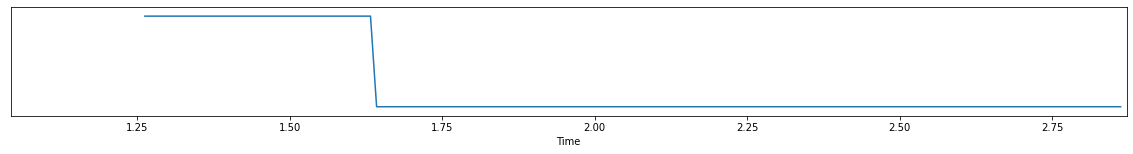

In [46]:
output.discretize()

# Speaker Verification

In [1]:
from scipy.spatial.distance import cdist
from pyannote.audio import Audio
from pyannote.core import Segment
import torch
from pyannote.audio.pipelines.speaker_verification import PretrainedSpeakerEmbedding

f:\ExamProctoringSystem\venv379\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.


In [13]:
wav_path1 = r"F:\ExamProctoringSystem\SpeakerVerificationModule\temp_data\clnsp0.wav"
wav_path2 = r"F:\ExamProctoringSystem\SpeakerVerificationModule\temp_data\temp_output_speech.wav"

### Testing embedding

In [12]:
model = PretrainedSpeakerEmbedding(
    "speechbrain/spkrec-ecapa-voxceleb")
audio = Audio(sample_rate=16000, mono=True)
# extract embedding for a speaker speaking between t=3s and t=6s
# speaker1 = Segment(3., 6.)
# waveform1, sample_rate = audio.crop("audio.wav", speaker1)
waveform1, sample_rate = audio(wav_path1)
embedding1 = model(waveform1[None])

# extract embedding for a speaker speaking between t=7s and t=12s
# speaker2 = Segment(7., 12.)
# waveform2, sample_rate = audio.crop("audio.wav", speaker2)
waveform2, sample_rate = audio(wav_path2)
embedding2 = model(waveform2[None])
# compare embeddings using "cosine" distance
distance = cdist(embedding1, embedding2, metric="cosine")[0,0]
print(distance, type(distance))


0.9751258778320053 <class 'numpy.float64'>


In [27]:
d = {"A":3, "B":1, "C":100}

# find key with lowest value
best_key = min(d, key=d.get)

print(best_key)
# output: B

B


### Final Code for speaker verification

In [71]:
from scipy.spatial.distance import cdist
from pyannote.audio import Audio
from pyannote.core import Segment
import torch
import os
import sounddevice as sd
import soundfile as sf
import numpy as np
import time
from pyannote.audio.pipelines.speaker_verification import PretrainedSpeakerEmbedding

In [53]:
AUDIO_DATABASE_DIR = r"F:\ExamProctoringSystem\SpeakerVerificationModule\audio_database"
AUDIO_TEMP_DIR = r"F:\ExamProctoringSystem\SpeakerVerificationModule\temp_data"
test_wav_path = r"F:\ExamProctoringSystem\SpeakerVerificationModule\temp_data\test_data.wav"
model = PretrainedSpeakerEmbedding("speechbrain/spkrec-ecapa-voxceleb")

In [66]:
# reference_embedding
audio = Audio(16000, True)
waveform, sample_rate = audio(test_wav_path)
print(waveform)
ref_embedding = model(waveform[None])

tensor([[ 0.0000e+00,  0.0000e+00, -3.0518e-05,  ...,  6.2866e-03,
          7.6294e-03,  5.1575e-03]])


In [55]:
embedding_dict = {}
wav_list = os.listdir(AUDIO_DATABASE_DIR)
print(wav_list)
for wav_file in wav_list:
    wav_path  = os.path.join(AUDIO_DATABASE_DIR, wav_file)
    waveform, samp_rate = audio(wav_path)
    embedding = model(waveform[None])

    # compare embeddings using "cosine" distance
    distance = cdist(ref_embedding, embedding, metric="cosine")[0,0]
    print(distance)
    embedding_dict[wav_file[:-4]] = distance
print(embedding_dict)

# Matched speaker: 
speaker = min(embedding_dict, key=embedding_dict.get)
print(speaker)

['Ashish Pondit.wav', 'Md Rukon.wav', 'Opu Bhai.wav']
0.7496719267778005
0.9175512980902075
0.5503520316129513
{'Ashish Pondit': 0.7496719267778005, 'Md Rukon': 0.9175512980902075, 'Opu Bhai': 0.5503520316129513}
Opu Bhai


### Record Audio

In [45]:
from genericpath import isfile


sample_rate = 16000
seconds = 5
for i in range(3, 0, -1):
    print(f"Recording in {i}")
    time.sleep(0.5)
print(f"Recording...")

myrecording = sd.rec(int(seconds * sample_rate),
                        samplerate=sample_rate, channels=1)
# wait until recording is finished
sd.wait()
print("Recording Finished")

save_path = os.path.join(AUDIO_TEMP_DIR, "temp.wav")
if os.path.isfile(save_path):
    os.remove(save_path)

# Save as FLAC file at correct sampling rate
sf.write(save_path, myrecording, sample_rate)  

Recording in 3
Recording in 2
Recording in 1
Recording...
Recording Finished


### Add New User

In [83]:
def add_user():
    name = input("Name:")
    sample_rate = 16000
    seconds = 5
    print("Please count 1 to 10 when recording starts.")
    for i in range(3, 0, -1):
        print(f"Recording in {i}")
        time.sleep(0.5)
    print(f"Recording...")

    myrecording = sd.rec(int(seconds * sample_rate),
                            samplerate=sample_rate, channels=1)
    # wait until recording is finished
    sd.wait()
    print("Recording Finished")

    save_path = os.path.join(AUDIO_DATABASE_DIR, f"{name}.wav")
    if os.path.isfile(save_path):
        os.remove(save_path)

    # Save as FLAC file at correct sampling rate
    sf.write(save_path, myrecording, sample_rate)  


In [84]:
add_user()

Please count 1 to 10 when recording starts.
Recording in 3
Recording in 2
Recording in 1
Recording...
Recording Finished


### Match User

In [85]:
def match_user():
    sample_rate = 16000
    seconds = 5
    print("Please count 1 to 10 when recording starts.")
    time.sleep(3)
    for i in range(3, 0, -1):
        print(f"Recording in {i}")
        time.sleep(1)
    print(f"Recording...")
    myrecording = sd.rec(int(seconds * sample_rate),
                            samplerate=sample_rate, channels=1)
    sd.wait()
    print("Recording Finished!")

    save_path = os.path.join(AUDIO_TEMP_DIR, "temp.wav")
    if os.path.isfile(save_path):
        os.remove(save_path)
    sf.write(save_path, myrecording, sample_rate)

    # reference_embedding
    audio = Audio(16000, True)
    waveform, sample_rate = audio(save_path)
    ref_embedding = model(waveform[None])

    # Match user
    embedding_dict = {}
    wav_list = os.listdir(AUDIO_DATABASE_DIR)
    print(wav_list)
    for wav_file in wav_list:
        wav_path  = os.path.join(AUDIO_DATABASE_DIR, wav_file)
        waveform, samp_rate = audio(wav_path)
        embedding = model(waveform[None])

        # compare embeddings using "cosine" distance
        distance = cdist(ref_embedding, embedding, metric="cosine")[0,0]
        print(distance)
        embedding_dict[wav_file[:-4]] = distance
    print(embedding_dict)

    # Matched speaker with minimul distance: 
    speaker = min(embedding_dict, key=embedding_dict.get)
    print(speaker)

In [86]:
match_user()

Please count 1 to 10 when recording starts.
Recording in 3
Recording in 2
Recording in 1
Recording...
Recording Finished!
['Ashish Pondit.wav', 'Md Rukon.wav', 'Muzahid.wav', 'Opu Bhai.wav']
0.8362691888082421
0.7419409347623587
0.4318893497486148
0.7299309870920798
{'Ashish Pondit': 0.8362691888082421, 'Md Rukon': 0.7419409347623587, 'Muzahid': 0.4318893497486148, 'Opu Bhai': 0.7299309870920798}
Muzahid


# CSV file Generation

In [1]:
import csv

In [13]:

header = ['name', 'area', 'country_code2', 'country_code3']
data = ['Afghanistan', 500, 'AF', 'AFG']

with open('countries.csv', 'w') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)

In [15]:
for i in range(100):
    with open('countries.csv', 'a') as f:
        writer = csv.writer(f, delimiter=',', lineterminator='\n')
        # write the data
        writer.writerow(data)

In [20]:
import csv
with open('large.csv','a') as f1:
    writer=csv.writer(f1, delimiter='\t',lineterminator='\n',)
    writer.writerow(range(10))
    for i in range(10):
        row = [i] + [i + j*0.2 for j in range(i+1)]
        writer.writerow(row)

# FAce Recognition Stages

In [16]:
import cv2
import numpy as np
import pandas as pd
from deepface.detectors import FaceDetector
import matplotlib.pyplot as plt
from deepface import DeepFace
import dlib
%matplotlib inline

## 1. Detection

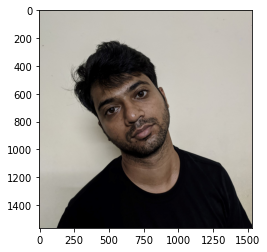

In [50]:
img_path = r"FaceRecognitionModule\FaceRecognitionStages\pondit1.jpg"
image = plt.imread(img_path)
plt.imshow(image)

In [7]:
detector = cv2.dnn.readNetFromCaffe("deploy.prototxt" , "res10_300x300_ssd_iter_140000.caffemodel")

In [17]:
image = cv2.imread("FaceRecognitionModule\FaceDatabase\pondit\pondit1.jpg")
base_img = image.copy()
original_size = base_img.shape
target_size = (300, 300)
image = cv2.resize(image, target_size)
aspect_ratio_x = (original_size[1] / target_size[1])
aspect_ratio_y = (original_size[0] / target_size[0])

In [18]:
#detector expects (1, 3, 300, 300) shaped input
imageBlob = cv2.dnn.blobFromImage(image = image)

In [19]:
detector.setInput(imageBlob)
detections = detector.forward()

In [20]:
column_labels = ["img_id", "is_face", "confidence", "left", "top", "right", "bottom"]
detections_df = pd.DataFrame(detections[0][0], columns = column_labels)

In [21]:
detections_df['left'] = (detections_df['left'] * 300).astype(int)
detections_df['bottom'] = (detections_df['bottom'] * 300).astype(int)
detections_df['right'] = (detections_df['right'] * 300).astype(int)
detections_df['top'] = (detections_df['top'] * 300).astype(int)

Id  0 . Confidence:  99.94 %


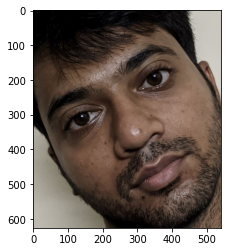

Id  1 . Confidence:  12.38 %


ValueError: zero-size array to reduction operation minimum which has no identity

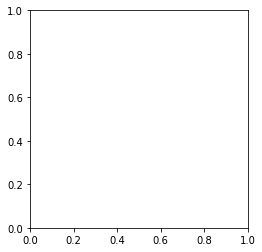

In [22]:
for i, instance in detections_df.iterrows():
    confidence_score = str(round(100*instance["confidence"], 2))+" %"
    left = instance["left"]; right = instance["right"]
    bottom = instance["bottom"]; top = instance["top"]
    detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y) ,
    int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
    print("Id ",i,". Confidence: ", confidence_score)
    plt.imshow(detected_face[:,:,::-1])
    plt.show()

## Face Alignment

In [17]:
import cv2
from deepface.commons import functions
face_detector = cv2.CascadeClassifier("FaceRecognitionModule\Required\haarcascade_frontalface_alt2.xml")
eye_detector = cv2.CascadeClassifier("FaceRecognitionModule\Required\haarcascade_eye.xml")
import mediapipe as mp
import dlib
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

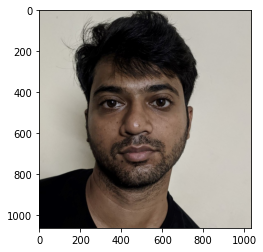

In [22]:
img_path = r"FaceRecognitionModule\FaceRecognitionStages\pondit11.jpg"
img = cv2.imread(img_path)
img_raw = img.copy()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [23]:
face_detector = dlib.get_frontal_face_detector()
face = face_detector(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 1)

245 348 707 811


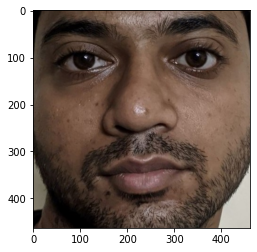

In [37]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
x1, y1, x2, y2 = 0, 0, 0, 0
for bbox in face:
        x1 = bbox.left()
        y1 = bbox.top()
        x2 = bbox.right()
        y2 = bbox.bottom()
        print(x1, y1, x2, y2)
plt.imshow(img_rgb[y1:y2, x1:x2])

## Normalization

In [38]:
import dlib
#http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
landmark_path = r"FaceRecognitionModule\Required\shape_predictor_68_face_landmarks.dat"
face_detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor(landmark_path)

In [41]:
#read with dlib
img = dlib.load_rgb_image(img_path)
faces = face_detector(img, 1)
landmark_tuple = []
for k, d in enumerate(faces):
   landmarks = landmark_detector(img, d)
   for n in range(0, 27):
      x = landmarks.part(n).x
      y = landmarks.part(n).y
      landmark_tuple.append((x, y))
      cv2.circle(img, (x, y), 2, (255, 255, 0), -1)

In [42]:
routes = []
 
for i in range(15, -1, -1):
   from_coordinate = landmark_tuple[i+1]
   to_coordinate = landmark_tuple[i]
   routes.append(from_coordinate)
 
from_coordinate = landmark_tuple[0]
to_coordinate = landmark_tuple[17]
routes.append(from_coordinate)
 
for i in range(17, 20):
   from_coordinate = landmark_tuple[i]
   to_coordinate = landmark_tuple[i+1]
   routes.append(from_coordinate)
 
from_coordinate = landmark_tuple[19]
to_coordinate = landmark_tuple[24]
routes.append(from_coordinate)
 
for i in range(24, 26):
   from_coordinate = landmark_tuple[i]
   to_coordinate = landmark_tuple[i+1]
   routes.append(from_coordinate)
 
from_coordinate = landmark_tuple[26]
to_coordinate = landmark_tuple[16]
routes.append(from_coordinate)
routes.append(to_coordinate)

In [43]:
for i in range(0, len(routes)-1):
   from_coordinate = routes[i]
   to_coordinate = routes[i+1]
   img = cv2.line(img, from_coordinate, to_coordinate, (255, 255, 0), 1)

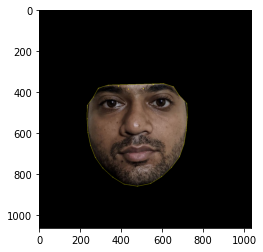

In [44]:
mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(np.bool)
 
out = np.zeros_like(img)
out[mask] = img[mask]
 
plt.imshow(out)

## Representation

In [ ]:
# In this way, we can represent images as 2622 dimensional vector
face_embedding = DeepFace.represent(img_path) 

In [48]:
print(len(face_embedding))

2622


In [49]:
print(face_embedding)

[0.015635866671800613, 0.012408719398081303, 0.007080685347318649, 0.0036842257250100374, 0.004912333097308874, 0.012075440026819706, 0.0020871467422693968, 0.009232506155967712, -0.001969367964193225, 0.0009575750445947051, 0.008409329690039158, 0.004322894383221865, 0.0037627320270985365, 0.0032847176771610975, 0.004820839036256075, 0.009906300343573093, 0.013270385563373566, 0.02236439660191536, 0.01875343732535839, 0.0004237061948515475, 0.016436664387583733, 0.013376482762396336, 0.02076845057308674, -0.000567060720641166, 0.008716816082596779, 0.015011572279036045, 0.006530883256345987, 0.013106618076562881, -0.005379128269851208, 0.0007879238692112267, 0.0018814211944118142, 0.010983212850987911, 0.006538736633956432, 0.008169458247721195, 0.01400543563067913, 0.009674927219748497, 0.007860413752496243, 0.0007882800418883562, -0.00028739654226228595, 0.0005018616793677211, 0.005607387516647577, 0.018634064123034477, -0.0004607022274285555, 0.019359545782208443, 0.012055745348334